# 머신러닝 소개

## 2.2 머신러닝 BASIC

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data_pepTestCustomers.csv")
df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0
2,ID12103,NaN,0,0,16575.4,1,0,1,1,1,0,0
3,ID12104,23.0,0,3,20375.4,1,3,0,0,1,0,0
4,ID12105,57.0,0,1,50576.3,1,0,0,1,0,0,0


In [3]:
new = pd.read_csv("data_pepNewCustomers.csv")
new.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0


## 데이터 나누기 : 학습용, 평가용

In [11]:
import matplotlib.pyplot as plt
%matploblib inline

UsageError: Line magic function `%matploblib` not found.


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text yticklabel objects>)

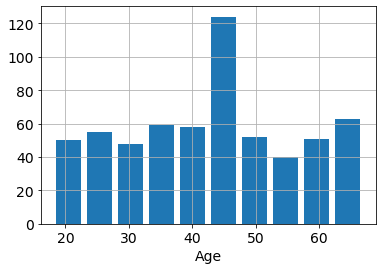

In [19]:
plt.hist(df.age, rwidth=0.8)
plt.grid()
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id             600 non-null object
age            540 non-null float64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [5]:
# 평균값으로 결측값 대체하기
df.age.fillna(rouend(df.age.mean(),0), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id             600 non-null object
age            600 non-null float64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [6]:
# 데이터 나누기
from sklearn.model_selection import train_test_split  

In [7]:
# scikit-learn에서는 속성과 클래스를 분리하여야 한다.
X = df.drop(['id','pep'], axis=1) 
Y = df['pep']                    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [8]:
# 지정한 비율(75:25)로 데이터가 잘 나누어졌는지 확인
display(X_train.shape, X_test.shape)
display(y_train.shape, y_test.shape)
X_train.head()
#y_train.head()

(450, 10)

(150, 10)

(450,)

(150,)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
46,50.0,0,0,13283.9,0,1,1,1,1,0
263,60.0,0,0,46358.4,1,0,1,1,1,1
458,18.0,1,2,13700.2,0,1,0,1,1,0
230,59.0,0,0,30189.4,1,0,1,0,1,1
107,23.0,1,0,13039.9,1,0,0,0,1,0


## 학습

In [20]:
# 학습 알고르즘 선정 : 의사결정나무
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [21]:
# 의사결정나무 알고리즘에 학습용 데이터를 학습한다.
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## 평가

In [22]:
display(tree.score(X_test, y_test))

0.8733333333333333

- 평가결과 모델의 정확율이 87.3% 로 나왔습니다. 

In [23]:
from sklearn.metrics import confusion_matrix

In [28]:
tree.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [29]:
confusion_matrix(tree.predict(X_test), y_test)

array([[71, 12],
       [ 7, 60]], dtype=int64)

In [30]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_test, tree.predict(X_test))

0.8633093525179857

## 전개(적용)

In [33]:
new = pd.read_csv("data_pepNewCustomers.csv")
new.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0


In [34]:
new['pred'] = tree.predict(new.loc[:,'age':'mortgage'])
new.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pred
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1,0
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1,0
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0,1
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1,1
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0,0


# - <span style="color:red">predict_proba, query</span> 처음 배움

In [35]:
# 개인연금 구매확률을 예측
new['pred_prob'] = tree.predict_proba(new.loc[:,'age':'mortgage'])[:,1]
new.head(10)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pred,pred_prob
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1,0,0.120000
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1,0,0.000000
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0,1,1.000000
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1,1,1.000000
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0,0,0.186047
5,ID12706,20,1,0,16688.50,0,1,0,1,1,1,1,1.000000
6,ID12707,46,0,1,39068.00,1,0,1,1,0,1,0,0.120000
7,ID12708,50,0,0,27740.80,1,1,1,1,0,1,1,1.000000
8,ID12709,42,1,0,33584.90,0,3,1,1,0,0,0,0.090909
9,ID12710,57,0,3,19621.30,1,1,1,0,1,0,1,0.928571


In [48]:
tree.predict_proba(new.loc[:,'age':'mortgage'])

array([[0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.81395349, 0.18604651],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [0.90909091, 0.09090909],
       [0.07142857, 0.92857143],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [0.81395349, 0.18604651],
       [0.96      , 0.04      ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.86956522, 0.13043478],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.96      , 0.04      ],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [45]:
tree.predict_proba(new.loc[:,'age':'mortgage'])[:, 1]

array([0.12      , 0.        , 1.        , 1.        , 0.18604651,
       1.        , 0.12      , 1.        , 0.09090909, 0.92857143,
       0.12      , 1.        , 0.18604651, 0.04      , 0.        ,
       1.        , 0.12      , 1.        , 1.        , 0.        ,
       1.        , 0.13043478, 1.        , 0.12      , 0.        ,
       1.        , 0.04      , 0.12      , 1.        , 1.        ,
       1.        , 0.13043478, 0.85      , 0.        , 0.18604651,
       1.        , 0.18604651, 0.12      , 0.        , 0.        ,
       1.        , 0.        , 0.92857143, 0.92857143, 1.        ,
       0.92857143, 1.        , 0.        , 0.18604651, 0.04      ,
       0.12      , 1.        , 1.        , 0.18604651, 0.        ,
       1.        , 1.        , 0.        , 0.13043478, 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.09090909, 0.        , 1.        ,
       1.        , 0.18604651, 0.        , 1.        , 0.04   

In [46]:
tree.predict_proba(new.loc[:,'age':'mortgage']).flatten()

array([0.88      , 0.12      , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.81395349, 0.18604651,
       0.        , 1.        , 0.88      , 0.12      , 0.        ,
       1.        , 0.90909091, 0.09090909, 0.07142857, 0.92857143,
       0.88      , 0.12      , 0.        , 1.        , 0.81395349,
       0.18604651, 0.96      , 0.04      , 1.        , 0.        ,
       0.        , 1.        , 0.88      , 0.12      , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.86956522, 0.13043478, 0.        ,
       1.        , 0.88      , 0.12      , 1.        , 0.        ,
       0.        , 1.        , 0.96      , 0.04      , 0.88      ,
       0.12      , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.86956522, 0.13043478, 0.15      ,
       0.85      , 1.        , 0.        , 0.81395349, 0.18604651,
       0.        , 1.        , 0.81395349, 0.18604651, 0.88   

In [38]:
# PEP에 가입할 확율이 70%가 넘는 고객만 추출
target = new.query('pred == 1 & pred_prob > 0.7')
target.sort_values(by="pred_prob", ascending=False).to_csv("pep_target_AN.csv", index=False)
pd.read_csv("pep_target_AN.csv").head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pred,pred_prob
0,ID12703,45,0,1,21881.6,0,0,1,1,1,0,1,1.0
1,ID12830,46,0,0,17049.3,0,1,0,1,0,0,1,1.0
2,ID12782,44,1,1,39202.2,0,1,1,1,1,1,1,1.0
3,ID12784,37,1,2,17629.3,1,1,0,1,1,1,1,1.0
4,ID12704,50,1,3,46794.4,1,2,0,1,0,1,1,1.0
